# Isochrons
|Author  | Stanley A. Baronett|
|--------|--------------------|
|Created | 2/23/2022          |
|Updated | 2/24/2022          |

## [Pape et al. (2019)](https://doi.org/10.1016/j.gca.2018.10.017)

![Pape et al. (2019), Fig. 3](../img/Pape_et_al_2019_Fig_3.png)
> Fig. 3. The impact of a poor quality sample surface (i.e. cracks) and high-$\mathrm{Ca}$ pyroxene dendrites on SIMS analysis exemplified with sample NWA8276_Ch9 (a).
  Using all SIMS measurements i.e. including spot #2 (c) measured in highly fractured mesostasis for the isochron regression, the resulting isochron (grey solid line) is biased towards lower $(^{26}\mathrm{Al}/^{27}\mathrm{Al})_0$ of $[(]2.9 \pm 4.6[)] \times 10^{-6}$, has a large error (error envelope is not shown for the sake of clarity) and a high [MSWD] of 11.6.
  The correct isochron (red solid line) includes only measurements with appropriate sample surface (e.g. spot #1 (b)).
  Spot #3 contained very minor amounts of high-$\mathrm{Ca}$ pyroxene dendrites, but this does not bias the isochron regression, because excluding spot #3 changes the isochron only slightly towards higher $(^{26}\mathrm{Al}/^{27}\mathrm{Al})_0$ (black dotted line, within the error of the original isochron) and would shift the relative age ($\Delta t_\mathrm{CAI}$) by less than 80,000 yrs. ol: olivine; mes: mesostasis.

In [1]:
import numpy as np
import pandas as pd

samples    = np.arange(1, 9)
phases    = ['mesostasis', 'mesostasis', 'mesostasis', 'mesostasis',
            'olivine',    'olivine',    'olivine',    'olivine']
Al_Mgs   = np.asarray([5.40, 6.20, 5.50, 4.30, 1.8e-3, 2.9e-4, 3.0e-4, 3.0e-4])
deltaMgs = np.asarray([0.28, 0.24, 0.28, 0.12,   0.00,   0.00,   0.01,   0.01])
sigma2s  = np.asarray([0.10, 0.08, 0.09, 0.07,   0.06,   0.05,   0.05,   0.05])

df = pd.DataFrame({
    'Sample'     : samples,
    'Phase'      : phases,
    '²⁷Al/²⁴Mg'  : Al_Mgs,
    'δ²⁶Mg* (‰)' : deltaMgs,
    '2σ'         : sigma2s,})
df.style.format({
    'Sample'     : 'NWA 8276 Ch9/{:d}',
    '²⁷Al/²⁴Mg'  : '{:.2e}',
    'δ²⁶Mg* (‰)' : '{:.2f}',
    '2σ'         : '{:.2f}',})

,Sample,Phase,²⁷Al/²⁴Mg,δ²⁶Mg* (‰),2σ
0,NWA 8276 Ch9/1,mesostasis,5.40e+00,0.28,0.10
1,NWA 8276 Ch9/2,mesostasis,6.20e+00,0.24,0.08
2,NWA 8276 Ch9/3,mesostasis,5.50e+00,0.28,0.09
3,NWA 8276 Ch9/4,mesostasis,4.30e+00,0.12,0.07
4,NWA 8276 Ch9/5,olivine,1.80e-03,0.00,0.06
5,NWA 8276 Ch9/6,olivine,2.90e-04,0.00,0.05
6,NWA 8276 Ch9/7,olivine,3.00e-04,0.01,0.05
7,NWA 8276 Ch9/8,olivine,3.00e-04,0.01,0.05


\begin{align*}
  N_{^xA}&=N_{^xA0}e^{-\lambda t} \\
  \ln\left(\frac{N_{^xA}}{N_{^xA0}}\right)&=-\lambda t \\
  \Delta t&=\frac{\ln(N_{^xA}/N_{^xA0})}{\lambda}
\end{align*}
where the initial $N_{^xA}=\left(^{26}\mathrm{Al}/^{27}\mathrm{Al}\right)_0$ is the slope of the linear regression, the canonical $N_{^xA0}={^{26}\mathrm{Al}}/^{27}\mathrm{Al}=5.23\times10^{-5}$, and $\lambda=\ln2/t_{1/2}$ is the decay constant.

\begin{align}
  \delta^nX=\left[\frac{\left(\frac{^nX}{^mX}_\mathrm{sample}\right)}{\left(\frac{^nX}{^mX}_\mathrm{standard}\right)}-1\right]\times1000
\end{align}

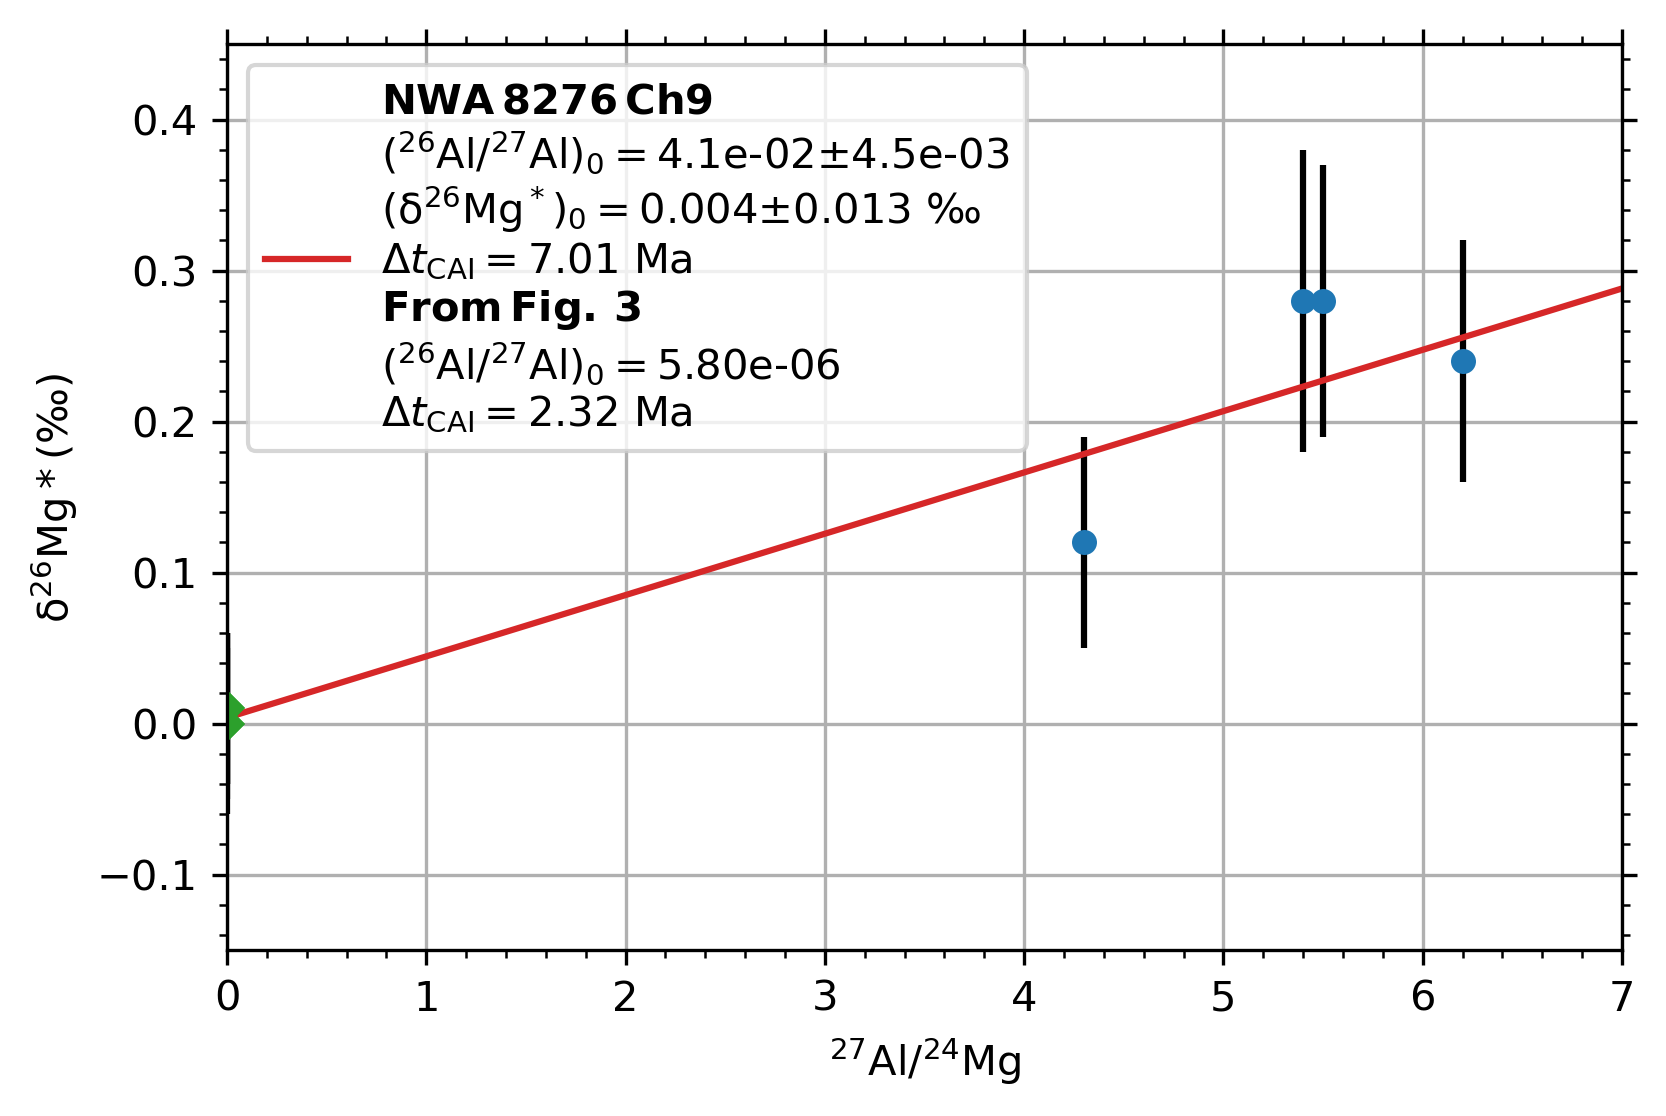

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

fig, ax = plt.subplots(dpi=300)
func = lambda x, m, b : m*x+b # linear model function
markers = ['o', 'o', 'o', 'o', 'D', 'D', 'D', 'D']
xfits = np.asarray([0, 7])
hl = 0.73                     # 26Al half-life / Ma
lambd = np.log(2)/hl          # 26Al decay constant
canon = 5.23e-5               # canonical 26Al/27Al

popt, pcov = curve_fit(func, Al_Mgs, deltaMgs, sigma=sigma2s/2)
perr = np.sqrt(np.diag(pcov))
slope3 = 5.8e-6
dt_cai = np.abs(np.log(popt[0]/canon)/lambd)
dt_cai3 = np.abs(np.log(slope3/canon)/lambd)
# dt_cai = 1/lambd - np.log(canon/popt[0]) # Brandon Scott's formula
t_caierr = 0                  # TO DO
mswd = 0                      # TO DO
lhs1 = r'$(^{26}\mathrm{Al}/^{27}\mathrm{Al})_0=$'
lhs2 = r'$(\mathrm{\delta}^{26}\mathrm{Mg}^*)_0=$'
lhs3 = r'$\Delta t_\mathrm{CAI}=$'
ln1 = r'$\mathbf{NWA\,8276\,Ch9}$'+'\n'
ln2 = lhs1 + f'{popt[0]:.1e}$\pm${perr[0]:.1e}\n'
ln3 = lhs2 + f'{popt[1]:.3f}$\pm${perr[1]:.3f} ‰\n'
ln4 = lhs3 + f'{dt_cai:.2f} Ma\n' #$\pm${t_caierr:.2f}
ln5 = r'$\mathbf{From\,Fig. \,3}$'+'\n'
ln6 = lhs1 + f'{slope3:.2e}\n'
ln7 = lhs3 + f'{dt_cai3:.2f} Ma'
# ln5 = f'MSWD {mswd:.2f}'
label = ln1+ln2+ln3+ln4+ln5+ln6+ln7
ax.errorbar(Al_Mgs[:4], deltaMgs[:4], sigma2s[:4], c='black', ls='',
            marker='o', mfc='tab:blue', mew=0, )
ax.errorbar(Al_Mgs[4:], deltaMgs[4:], sigma2s[4:], c='black', ls='',
            marker='D', mfc='tab:green', mew=0, )
ax.plot(xfits, func(xfits, *popt), color='tab:red', label=label)
ax.grid()
ax.legend(loc='upper left')
ax.minorticks_on()
ax.set(xlabel=r'$^{27}\mathrm{Al}/^{24}\mathrm{Mg}$',
       ylabel=r'$\mathrm{\delta}^{26}\mathrm{Mg}* $(‰)',
       xlim=(0, 7), ylim=(-0.15, 0.45))
ax.tick_params(axis='both', which='both', top=True, right=True)